# Plotting onto Column Cells

By providing a `plot_fn (Callable)` to a ColumnDefinition, plottable creates an axes on top of each Cell of this column, and creates plots based on each cell's value.

You can provide additional keywords to the plot function by passing a `plot_kw` dictionary to ColumnDefinition.

```python

    plot_fn: Callable = None
        A Callable that will take the cells value as input and create a subplot
        on top of each cell and plot onto them.
        To pass additional arguments to it, use plot_kw (see below).
    plot_kw: Dict[str, Any] = field(default_factory=dict)
        Additional keywords provided to plot_fn.
```

Commonly used example plots are provided in plottable.plots. You can have a look at them below.

## Creating Custom Plot Functions

You can also easily create your own functions. Just make sure to have  
``ax: matplotlib.axes.Axes`` as first and  
`val: Any` (the cells value) as second arguments.

```python
def custom_plot_fn(
    ax: matplotlib.axes.Axes,
    val: Any,
    # further arguments that can be passed via plot_kw
    ):
    ...
```

for more complex data you can create a dictionary or function that gets data based on the cells value, ie.

```python
def custom_plot_fn(
    ax: matplotlib.axes.Axes,
    val: Any,
    # further arguments that can be passed via plot_kw
    ):
    
    data = my_data_dict.get(val)
    or
    data = my_data_getter_function(val)
```

You can create Sparklines, Histograms, ... you name it.  

If you create any cool plots to use with plottable, please consider sharing them by creating a Pull Request!

## Available Plots

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from plottable import ColumnDefinition, Table
from plottable.plots import *

In [2]:
path = list(Path("../example_notebooks/country_flags").glob("*.png"))[0]
cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=256
)

## percentile_bars

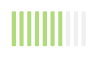

In [3]:
fig, ax = plt.subplots(figsize=(1, 0.5))

bars = percentile_bars(ax=ax, val=72, color="#b0db7c", background_color="#f0f0f0", is_pct=False)

plt.show()

# fig.savefig(Path.home() / "Downloads/percentile_plot.png")

## image

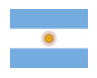

In [4]:
fig, ax = plt.subplots(figsize=(1, 1))

image(ax, path)

plt.show()


## circled_image

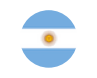

In [5]:
fig, ax = plt.subplots(figsize=(1, 1))

im = circled_image(ax, path)

plt.show()


## circled_image with border

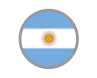

In [6]:
fig, ax = plt.subplots(figsize=(1, 1))

im = circled_image(ax, path, linewidth=2, visible=True, edgecolor="#999999")

plt.show()


## bar

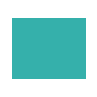

In [7]:
fig, ax = plt.subplots(figsize=(1, 1))
b = bar(ax, 1, color="k", cmap=cmap)
plt.show()

## bar with value annotation and linecolor

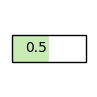

In [8]:
fig, ax = plt.subplots(figsize=(1, 1))
b = bar(ax, 0.5, plot_bg_bar=True, cmap=cmap, annotate=True, lw=1, height=0.35)
plt.show()

## percentile_stars

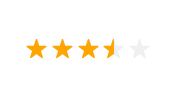

In [9]:
fig, ax = plt.subplots(figsize=(2, 1))

stars = percentile_stars(ax, 70, background_color="#f0f0f0")

## progress_donut

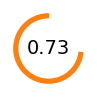

In [10]:
fig, ax = plt.subplots(figsize=(1, 1))
donut = progress_donut(ax, 73, textprops={"fontsize": 14})
plt.show()